**Step 1: Initialize Git Repository**

https://github.com/ypottiez/Numpy-Project

**Step 2: Create Virtual Environment with Anaconda**

Virtual environment: numpyproj.yml (root folder)

**Step 3: Choose & load image**

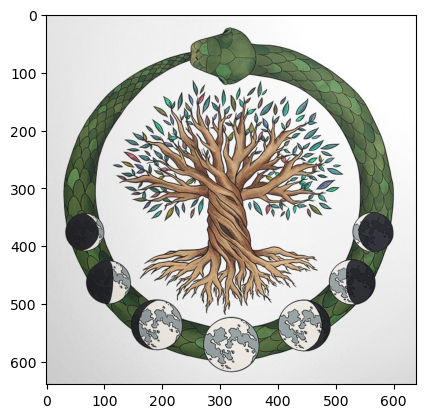

Breedte: 639
Hoogte: 639


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the image directly using Matplotlib
current_path = os.getcwd()
loc_input_img = os.path.join(current_path,'..','data','input' ,'ouroboros.jpg')
image = plt.imread(loc_input_img)

# Display the image using Matplotlib
plt.imshow(image)
plt.show()

# Get the dimensions of the image
height, width, channels = image.shape

# Print the dimensions
print("Breedte:", width)
print("Hoogte:", height)



**Step 4: Do my image manipulations**

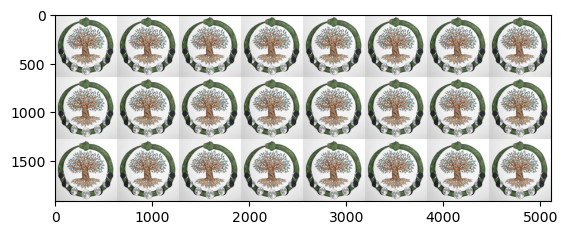

In [2]:
# Define the number of rows and columns in the grid
rows = 3
columns = 8

# Tile the image to cover the entire grid
tiled_image = np.tile(image, (rows, columns, 1))

plt.imshow(tiled_image)
plt.show()

plt.imsave(os.path.join('..', 'data', 'output', 'image_manipulation1.jpg'),tiled_image)


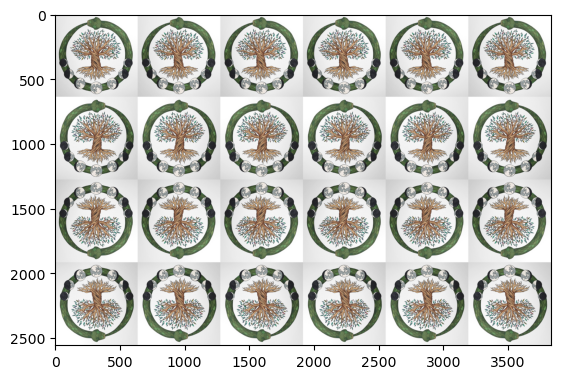

In [3]:
# Define the number of rows and columns in the grid
rows = 4
columns = 6

# Make an empty array for the grid
grid = np.zeros((height * rows, width * columns, channels), dtype=np.uint8)

# Pre-process the image based on rows
mirrored_images = [image, np.fliplr(image), np.flipud(image), np.flipud(np.fliplr(image))]

# Fill the grid with the copied images
for row in range(rows):
    for col in range(columns):
        # Get the pre-processed image based on the current row
        np_image_row = mirrored_images[row % len(mirrored_images)]
        grid[row * height: (row + 1) * height, col * width: (col + 1) * width] = np_image_row

# Show the resulting grid
plt.imshow(grid)
plt.show()

plt.imsave(os.path.join('..', 'data', 'output', 'image_manipulation2.jpg'),grid)

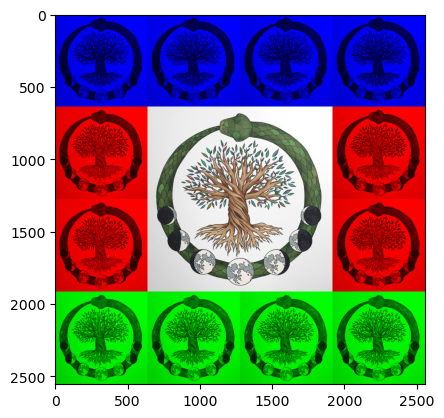

In [4]:
def resize_image(image, scale_factor):
    # Resize the image using numpy's vectorized operations
    new_height = int(image.shape[0] * scale_factor)
    new_width = int(image.shape[1] * scale_factor)
    
    enlarged_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)
    
    for channel in range(image.shape[2]):
        enlarged_image[:,:,channel] = np.repeat(np.repeat(image[:,:,channel], scale_factor, axis=0), scale_factor, axis=1)
    
    return enlarged_image

def overlay_images(background, foreground, position):
    combined_image = np.copy(background)
    
    fg_height, fg_width, _ = foreground.shape
    
    x, y = position
    
    x_start = max(0, x)
    x_end = min(background.shape[1], x + fg_width)
    y_start = max(0, y)
    y_end = min(background.shape[0], y + fg_height)
    
    combined_image[y_start:y_end, x_start:x_end] = foreground[:y_end-y_start, :x_end-x_start]
    
    return combined_image

# Example usage:
scale_factor = 2
enlarged_image = resize_image(image, scale_factor)

tiled_img = np.tile(image, (1, 4, 1))
blue_f = tiled_img.copy()
blue_f[:,:,[0,1]] = 0
red_f = tiled_img.copy()
red_f[:,:,[1,2]] = 0
green_f = tiled_img.copy()
green_f[:,:,[0,2]] = 0
stacked_image = np.concatenate((blue_f, red_f, red_f, green_f), axis=0)

position = (639, 639)
result_image = overlay_images(stacked_image, enlarged_image, position)

plt.imshow(result_image)
plt.show()

plt.imsave(os.path.join('..', 'data', 'output', 'image_manipulation3.jpg'),result_image)


**Step 5: Generalize these manipulations**

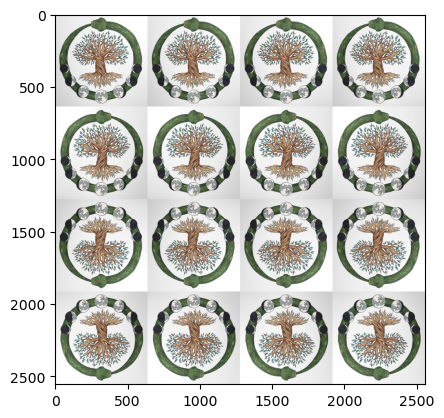

In [5]:

def grid_with_flips(image, matrix):
    # Define the dimensions of the grid
    rows, columns = matrix.shape
    height, width, channels = image.shape
    
    # Make an empty array for the grid
    grid = np.zeros((height * rows, width * columns, channels), dtype=np.uint8)

    # Pre-process the image based on flips specified in the matrix
    mirrored_images = [image, np.fliplr(image), np.flipud(image), np.flipud(np.fliplr(image))]

    # Fill the grid with the pre-processed images
    for row in range(rows):
        for col in range(columns):
            # Get the pre-processed image based on the flip type specified in the matrix
            flip_type = matrix[row, col]
            np_image_row = mirrored_images[flip_type % len(mirrored_images)]
            grid[row * height: (row + 1) * height, col * width: (col + 1) * width] = np_image_row

    # Show the resulting grid
    plt.imshow(grid)
    plt.show()
    
    return grid

# Example usage
matrix = np.array([[0, 0, 0, 0], [1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]])  # Example flip matrix
grid_with_flip = grid_with_flips(image, matrix)

output_path = os.path.join('..', 'data', 'output', 'image_manipulation_generalize.jpg')
plt.imsave(output_path, grid_with_flip)


**Step 6: Your own manipulations**

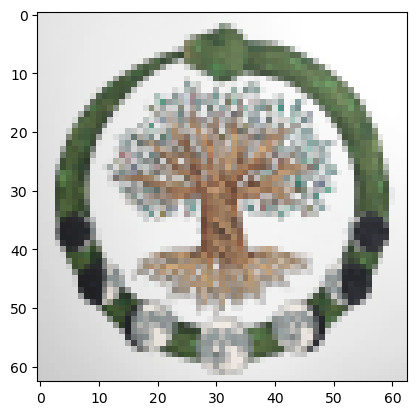

In [13]:
def pixelate_image(image, pixel_size):
    # Get dimensions of the image
    height, width, channels = image.shape
    
    # Calculate new dimensions based on pixel_size
    new_height = height // pixel_size
    new_width = width // pixel_size
    
    # Create a new image with the new dimensions
    pixelated_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    # Iterate over the new image and fill each pixel with the mean color of the corresponding block in the original image
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the boundaries of the block
            start_i = i * pixel_size
            end_i = start_i + pixel_size
            start_j = j * pixel_size
            end_j = start_j + pixel_size
            
            # Extract the block from the original image
            block = image[start_i:end_i, start_j:end_j, :]
            
            # Calculate the mean color of the block
            mean_color = np.mean(block, axis=(0, 1))
            
            # Fill the corresponding block in the new image with the mean color
            pixelated_image[i, j, :] = mean_color.astype(np.uint8)
    
    return pixelated_image

# Example usage:
image = image

# Specify the pixel size for pixelation (e.g., 10 pixels)
pixel_size = 10

# Pixelate the image
pixelated_image = pixelate_image(image, pixel_size)

# Display the pixelated image

plt.imshow(pixelated_image)
plt.show()

# Save the resulting image
output_path = os.path.join('..', 'data', 'output', 'image_manipulation_pixelated.jpg')
plt.imsave(output_path, pixelated_image)




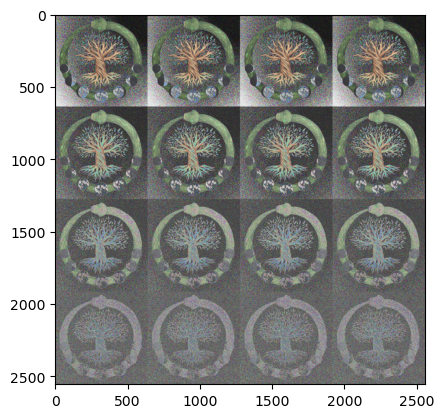

In [6]:
# Define the number of rows and columns in the grid
rows = 4
columns = 4

# Define the upper bounds for each row
ubs = [50, 100, 150, 200]  # Example upper bounds, adjust as needed

# Make an empty array for the grid
grid = np.zeros((image.shape[0] * rows, image.shape[1] * columns, image.shape[2]), dtype=np.uint8)

# Fill the grid with the blurred images for each row
for row in range(rows):
    # Generate blurred version of the original image with random noise added
    f_blurred = image.copy()
    lb = 0
    ub = ubs[row]  # Use the corresponding upper bound for the current row
    f_blurred[:,:,0] += np.random.randint(lb, ub, (image.shape[0], image.shape[1]), dtype='uint8')
    f_blurred[:,:,1] += np.random.randint(lb, ub, (image.shape[0], image.shape[1]), dtype='uint8')
    f_blurred[:,:,2] += np.random.randint(lb, ub, (image.shape[0], image.shape[1]), dtype='uint8')

    for col in range(columns):
        grid[row * image.shape[0]: (row + 1) * image.shape[0], col * image.shape[1]: (col + 1) * image.shape[1]] = f_blurred

# Show the resulting grid
plt.imshow(grid)
plt.show()

# Save the resulting grid
output_path = os.path.join('..', 'data', 'output', 'image_manipulation_blurred.jpg')
plt.imsave(output_path, grid)
